# Aprendizaje No Supervisado

El aprendizaje supervisado generalmente busca relacionar las variables de entrada $\mathbf{x}$ con una variable de salida $\mathbf{y}$. Esto se puede interpretar como el encontrar una transformación de los datos de entrada, de tal forma que se minimice una función de costo determinada para el problema específico. De esta forma la función de costo, que indica en cierta forma que tan bien se ajustan la predicción de la salida con el valor observado de la variable de salida, determina el aprendizaje del método bajo estudio.

En aprendizaje no supervisado no se cuenta con una observación deseada de la variable de salida, solamente se tienen los datos de entrada. La idea es utilizar algún tipo de herramienta para poder encontrar similitudes entre los datos (su estructura interna). Generalmente, estos problemas están definidos por espacios de entrada de dimensiones mayores a los utilizados en los métodos supervisados.

En este orden de ideas, diferentes tipos de técnicas de aprendizaje no supervisado pueden ser utilizadas para reducir la dimensionalidad de los datos, encontrando manifolds de bajo dimensionalidad (curvas en el espacio) donde estos datos preservan la mayoría de la información que contienen. Métodos como PCA, Curvas Principales, Mapas auto-organizados, pueden ser utilizados para disminuir la complejidad de estos datos, i.e. estimar las densidades de probabilidad de los datos en un espacio dimensional más pequeño. Por otro lado, otra aproximación puede ser utilizada para agrupar por algún tipo de medida de similaridad estos datos en grupos similares. En este ultimo caso las técnicas de agrupamiento (clustering) como k-means, k-medoids o agrupamiento jerárquico (hierarchical clustering) pueden ser utilizadas, de forma que la densidad de probabilidad de los datos de entradas se expresa como una mezcla de distribución de densidades más simples relacionadas con datos de diferentes grupos.

La falta de una medida de rendimiento en los métodos de aprendizaje no supervisado ha hecho que los resultados se evalúen desde un punto de vista más subjetivo, lo cual ha incentivado la proliferación de muchos métodos.

## Analísis de Clusters

El análisis de clusters también se conoce como Segmentación de datos. La idea de estos algoritmos es segmentar los datos en grupos de datos comunes, de tal forma que los datos pertenecientes a un mismo grupo están más relacionados entre si, que con datos que pertenecen a otro grupo.

Un dato (observación u objeto) puede estar caracterizado por un conjunto de valores, o por su relación con otros objetos. En el último caso se expresaría esa relación a través  de una medida de similaridad. A partir de esas medida de similaridad entre objetos se puede crear lo que se conoce como una matriz de adyacencia (de similitud, similaridad, proximidad), la cual puede ser utilizada también desde el punto de vista de grafos.

Una de las metodologías más estudiadas que se utiliza para realizar clustering es **k-means**, este método se clasifica entre los algoritmos de clustering del tipo *top-down*, es decir que primero define unos grupos y con base en el criterio dado modifica los centroides de los grupos hasta que llega a un valor que minimiza la función de costo asociada al problema. Otras metodologías se aproximan al problema de segmentación por medio de métodos *bottom-up*, estas empiezan a agrupar unos pocos elementos y el tamaño de los clusters va creciendo a medida que se hace entrenamiento.

### Matrices de Proximidad

Muchas veces los datos utilizados tienen una dimensionalidad muy grande, por lo cual puede que se haga un poco problemático trabajar con estos valores. Además, se hace difícil de forma visual poder generar una idea de como están distribuidos los datos. En estos casos se hace útil generar una matriz de proximidad que indica, a través de una medida de similaridad, como dos objetos (muestras) del conjunto de datos están relacionados. 

Supongamos que se tiene un conjunto de entrenamiento $\mathbf{X} \in \mathbb{R}^{N\times d}$, donde $N$ es el número de observaciones, y $d$ es la dimensionalidad de cada observación (cantidad de atributos medidos para un objeto). Sea $d_{ij}$ una medida de similaridad entre la observación $i$ y la observación $j$, por ejemplo, la fila $i$ y la fila $j$ de la matriz $\mathbf{X}$.

**Pregunta:** $\color{green}{\text{¿Qué tipo de medidas de similaridad se pueden usar?}}$

**Solución:** La medida de similaridad puede ser una distancia (euclidea, de manhattan, etc..), una medida de correlación, coherencia, entropía mutua, entropía de transferencia, etc.

De esta forma, se puede formar una matriz de similaridad $\mathbf{D} \in \mathbb{R}^{N\times N}$, con elementos $d_{ij}$ que representan la medida de similaridad entre $\mathbf{x}_i$ y $\mathbf{x}_j$, donde $i$ define la fila y $j$ la columna de la matriz $\mathbf{X}$.

Las matrices de proximidad generadas en su mayoría son simétricas. Si la matriz utilizada no es simétrica, y el algoritmo requiere que lo sea, se puede transformar a una matriz simétrica mediante la transformación $\mathbf{\hat{D}}=(\mathbf{D}+\mathbf{D}^{\text{T}})/2$. A veces también su usan matrices de disimilaridad, las cuales indican que tan disimilares son dos observaciones. 

## K-means

El algortimo de K-means busca segmentar los datos en grupos (cluster) de observaciones, de tal forma que la distancia euclidiana entre las observaciones del mismo grupo sea pequeña y la distancia euclidiana entre observaciones de diferentes grupos sea grande.

### Principio de k-means

- Se divide el conjunto de datos de las $n$ observaciones  en $K$ subconjuntos distintos y no superpuestos.
  - Cada conjunto, se denota como $C_k$, $k=1, .., K$, y se denomina *cluster*.

- Ocurre un buen agrupamiento cuando: la variación dentro del clúster (*within-cluster*) es lo más pequeña posible.

- Sea $W(C_k)$ una medida de la variación *within-cluster* para el clúster $C_k$. Deseamos minimizar las variaciones totales dentro del clúster:

$$ \hbox{min}_{C_1, ..., C_K} \Bigl\{ \sum_{k=1}^K W(C_K)\}$$

- Hay varias formas diferentes de definir $W(C_k)$. Por ejemplo, usando la distancia euclidiana al cuadrado, definimos:
$$ W(C_k)= {1 \over |C_k|}   \sum_{i, j \in C_k} \|\bf{x}_i - \bf{x}_j\|^2$$

### Algoritmo de k-means

1. Asigne aleatoriamente un número, de 1 a K, a cada una de las observaciones. Estos sirven como asignaciones de grupos iniciales para las observaciones.

2. Repita hasta que las asignaciones de clústeres dejen de cambiar:

    1. Para cada uno de los K clústeres, calcule el centroide del clúster. El centroide del k-ésimo clúster es el vector de las $p$ medias de los descriptores para las observaciones en el k-ésimo clúster.
        
    2. Asigne cada observación al grupo cuyo centroide esté más cerca (donde más cercano se define utilizando la distancia euclidiana).

### Observaciones acerca del algoritmo k-means
- La función objetivo siempre disminuye en cada paso.

- Se puede demostrar fácilmente la siguiente equivalencia: $${1 \over |C_k|} \sum_{i, j\in C_k} \|\bf{x}_i - \bf{x}_j\|^2
= 2 \sum_{i \in C_k} \|\bf{x}_i - \bar{\bf{x}}\|^2
$$
donde $\bar{\bf{x}}$ es la media de la muestra $\bf{x}_i$ para $i \in C_k$

- El algoritmo $K$-means encuentra un mínimo local.

- El resultado depende de la asignación inicial de clústers (aleatoria).

- Pruebe con varios valores iniciales y seleccione el mejor resultado (el que tenga el más pequeño valor de la función objetivo).

## Aplicando k-means

Revisemos un ejercicio donde tenemos 4 clusters y observemos como luce la matriz de disimilaridad utilizando la distancia euclidiana. Luego, organicemos los datos por clusters y veamos como se ve la matriz organizada. Repitamos el procedimiento ahora con una medida de similaridad (se puede también usar cosine similarity - correlación)

Text(0, 0.5, 'Caracteristica 2')

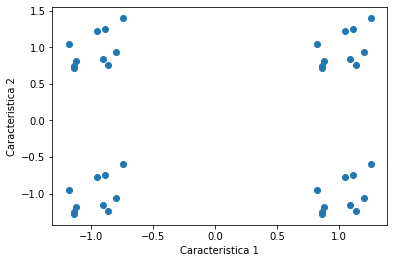

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Creando la dispercion de lso datos
data = np.random.rand(10,2);
data = data-data.mean()

# Creando 4 clases centradas en diferentes puntos del plano 
X1 = 0.8*data+[1,1]
X2 = 0.8*data+[-1,1]
X3 = 0.8*data+[-1,-1]
X4 = 0.8*data+[1,-1]

# Construyendo la matrix de carcteristicas y mezclando aleatoriamente los datos
X = np.concatenate((X1,X2,X3,X4),axis=0)
Xt = X.copy()
np.random.shuffle(Xt)

# Graficando los datos
plt.scatter(Xt[:,0],Xt[:,1])
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

kmeans = KMeans(n_clusters=4).fit(Xt)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.02591044 -1.02591044]
 [-0.97408956  0.97408956]
 [-0.97408956 -1.02591044]
 [ 1.02591044  0.97408956]]


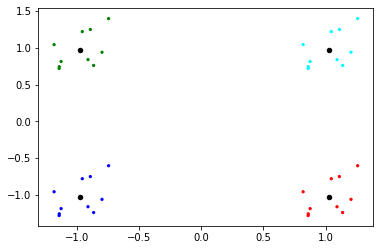

In [3]:
# Prediciendo los grupos
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)

Ahora vamos a observar la matriz de similaridad de los datos de entrenamiento

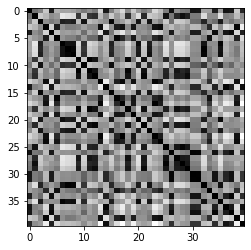

In [5]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(Xt, Xt, metric='euclidean')
D = D/D.max()
plt.imshow(D,cmap='gray')

**Pregunta:** <font color='green'>¿Cómo luce la matriz si lo acomodamos los datos en orden, colocando primero \nd los valores que pertenecen a un cluster, luego los del cluster 2, etc.?

**Solución:** Para hacer esto calculamos la matriz de distancias utilizando la matriz de observaciones $\mathbf{X}$. De esta forma obtenemos lo siguiente

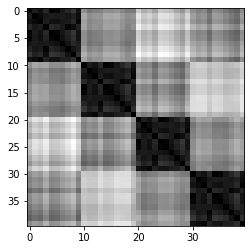

In [6]:
D = pairwise_distances(X, X, metric='euclidean')
D = D/D.max()
plt.imshow(D,cmap='gray')

<font color='green'>**Pregunta:** ¿Qué puede observar de esta matriz ordenada?

**Solución:** Aqui se puede ver que los grupos generarn una estructura en la matriz de dissimilaridades.

Ahora revisemos el proceso con la matriz de correlaciones:

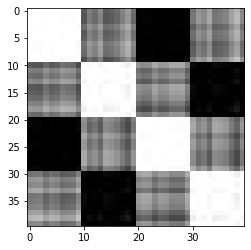

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
#D = np.abs(cosine_similarity(X, X))
D = cosine_similarity(X, X)
D = (D+1)/2
plt.imshow(D,cmap='gray')

**Pregunta:** <font color='green'> ¿Qué opinan?

### K-medoids

K-means funciona muy bien cuando se toma como medida de disimilaridad la distancia euclidiana. Sin embargo, esta distancia esta sesgada por distancias grandes, y valores que tengan distancias pequeñas no van a afectar mucho la función de costo. Por esta razón, cuando se tienen outliers k-means no es un método robusto.

Si se generaliza k-means para tomar cualquier otro tipo de medida de disimilaridad se puede llegar a un algoritmo un poco más robusto, de esta forma se obtiene el algoritmo de k-medoids.

**Algoritmo K-medoids Clustering**.
1. Para una asignación $C$ de clúster dada encuentre la observación en el clúster minimizando la distancia total a otros puntos en ese clúster:
$$
i_{k}^{*}=\underset{\{i: C(i)=k\}}{\operatorname{argmin}} \sum_{C\left(i^{\prime}\right)=k} D\left(x_{i}, x_{i^{\prime}}\right)
$$
Entonces, $m_{k}=x_{i_{k}^{*}}, k=1,2, \ldots, K$ son las estimaciones actuales de los centros de los clústers.
2. Dado un conjunto actual de centros de clúster $\left\{m_{1}, \ldots, m_{K}\right\}$, minimice el error total asignando cada observación al centro de clústers más cercano (actual):
$$
C(i)=\underset{1 \leq k \leq K}{\operatorname{argmin}} D\left(x_{i}, m_{k}\right)
$$
3. Repita los pasos 1 y 2 hasta que las asignaciones no cambien.

**Pregunta**. <font color='green'> ¿Cuál es la diferencia más importante entre k-means y k-medoids?

En este algoritmo, el centroide de los datos no se asume como la media aritmética de los datos, sino el elemento que más cercano se encuentre a este valor.

### Aplicando k-medoids

Este método no está por defecto en scikit-learn, para usarlo hay que instalar la librería scikit-learn-extra:

Se puede instalar mediante:

```
conda install -c conda-forge scikit-learn-extra
```

o:

```
pip install scikit-learn-extra

```

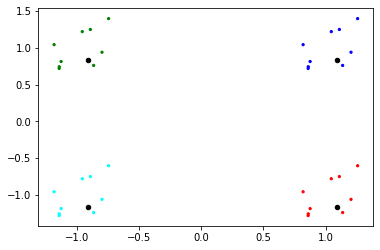

In [9]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=4, random_state=0).fit(Xt)
labels = kmedoids.predict(Xt)

C = kmedoids.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(Xt[:, 0], Xt[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)


Text(0, 0.5, 'Caracteristica 2')

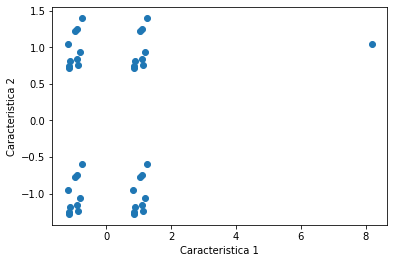

In [10]:
Xp = Xt.copy()
Xp[0,0] = 10*Xp[0,0]

# Graficando los datos
plt.scatter(Xp[:,0],Xp[:,1])
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

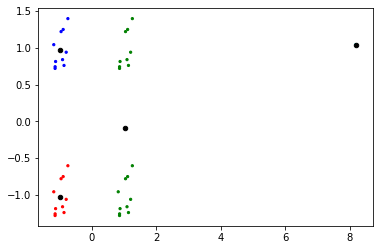

In [11]:
kmeans = KMeans(n_clusters=4).fit(Xp)

labels = kmeans.predict(Xp)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(Xp[:, 0], Xp[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)

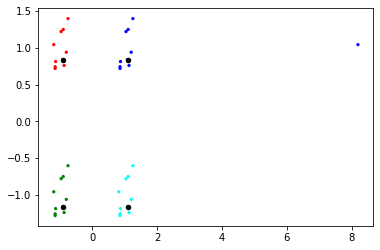

In [12]:
kmedoids = KMedoids(n_clusters=4, random_state=2).fit(Xp)
labels = kmedoids.predict(Xp)

C = kmedoids.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(Xp[:, 0], Xp[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)

**Pregunta:** <font color='green'>  ¿Qué pueden observar del comportamiento de k-means y de k-medoids?

**Solución:** se puede ver que k-medoids es más robusto que k-means.

### Cómo seleccionar el número de clusters

Existen varias formas de seleccionar el número de clusters:

1. Dado por el problema: El problema indica el número de clusters que se deben utilizar
2. Basados en datos: una medida que se conoce es el método del elbow. Sin embargo, existe otra que ha cobrado mucha fuerza. Esta se denomina *Gap statistics*.

### Gap Statistics: 

El gap statistics mide la variación de la variabilidad entre las observaciones de los clusters a medida que $k$ aumenta. Esta variabilidad decrece con $k$. De forma práctica, para valores de $k$ menores al número óptimo  de grupos este decrecimiento es rápido, porque a medida que aumenta el $k$, las observaciones se van acercando al agrupamiento establecido por los datos. Mientras que para valores de $k$ mayores al valor óptimo esto hará que la intra-variabilidad de los clusters disminuya de forma lenta.

EL criterio del gap, lo que realiza es comparar la variación logarítmica de esta variabilidad de las observaciones de cada cluster versus la variabilidad observada en el agrupamiento de datos aleatorios distribuidos uniformemente sobre el espacio de variación de los datos. Y estima el número de clusters óptimo como el valor de $k$ que produce la máxima distancia entre las dos curvas, a esa diferencia se le denomina el *gap*.

<img src="img/gap.png" width="800">

Existen otras formas de estimar ese número de clusters, si vemos la matriz de proximidades, ahí se puede ver que existen 4 regiones dominantes, estas regiones representan una especie de eigenvectores necesarios para poder hacer una reconstrucción de bajo rango de la matriz. Por lo tanto observando los eigenvalores de la matriz de adyacencia se pueden determinar cuantos eigenvectores se necesita para aproximar esta matrix, y con base en eso definir el número de clusters.

## Hierarchical Clustering

El agrupamiento jerárquico no necesita que se especifique el número de clusters necesarios para poder realizar el agrupamiento. Para este método solo basta con asignar una medida de similaridad que se utilizara para comparar las observaciones. La idea detrás de este método es que establece una jerarquía para las agrupaciones, al nivel mas bajo se encuentran todos los datos, al siguiente nivel se agrupan las observaciones cuya medida de disimilaridad sea menor a un umbra $T_0$, al siguiente nivel agrupa los subgrupos cuya medida de disimilaridad es mayor a un umbral $T_1$, con $T_0<T_1$, y así sucesivamente. De esta forma, a un nivel de jerarquía $i$ determinado, los grupos que se forman son aquellos cuya medida de disimilaridad es menor al umbral $T_{i-1}$.

Se puede representar de forma gráfica cuando dos puntos, o subgrupos son unidos por medio de líneas, formando un diagrama de representación de agrupamiento en cada nivel. A este diagrama se le conoce como un **dendrograma** y puede ser utilizado para evaluar el comportamiento del algoritmo y la métrica utilizada.

<img src="img/jerarquico.png" width="500">

### Algoritmo de clustering jerárquico

1. Empiece con $n$ observaciones y una medida (como la distancia euclidiana) de todas las ${n \choose 2} = n(n-1)/2$ disimilaridades entre pares (de puntos). Trate cada observación como su propio clúster.
2. Para $i=n, n-1, ...2$:
   1. Examine todas las disimilaridades inter-clúster a través de los $i$ clusters e identifique el par de clústers que son menos diferentes (es decir, más similares). Fusione estos dos clústers. La diferencia entre estos dos clústers indica la altura en el dendrograma a la que debe colocarse la fusión.
   2. Calcule las nuevas disimilaridades inter-clústers por pares (de clústers) entre los $i -1$ clústers restantes.

Las disimilaridades se pueden realizar mediante unas funciones de enlace (o linkage):

<img src="img/linkageTable.png" width="500">

Uno puede utilizar la informacion de las muestras que se agrupan y de esta forma revelar información sobre las caracteristicas de los datos. Tal como se muestra en esta imagen de agrupamiento de expresión de genes.

<img src="img/genes.png" width="500">

#### Clustering Jerárquico en scikit-learn

scikit-learn implementa el clustering jerárquico en `sklearn.cluster.AgglomerativeClustering`. Pueden ver un ejemplo de cómo usarlo y graficar un dendograma en [está página](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).

## ¿Cómo evaluar que tan bueno es un algoritmo de clustering?

Normalmente la validación de un algoritmo de clustering es subjetiva. Sin embargo, existe un método para determinar que tan consistente es el agrupamiento obtenido con estos algoritmos. Este método se conoce como la **Silueta**

### Silueta

La silueta es un método que sirve para determinar de forma visual, que tan bien los elementos de un cluster han sido agrupados, esto se mide por medio de una métrica que índica que tan similar es una observación a su propio grupo, comparada con los otros grupos (Cohesion vs Separación). El valor de la silueta varia desde -1 a 1, donde valores positivos altos indican que la observación se parece a su grupo y difiere de los demás grupos, y valores negativos altos indican que la observación se parece más a datos de otros grupos. Si existen muchos valores negativos de silueta para elementos dentro de un cluster, es una indicación de que se debe aumentar el numero de grupos. 

Para obtener la medida de distancia se utiliza:

$$a(i) = \frac{1}{|C_i|-1}\sum_{j\in C_i,i~=j}d(i,j)$$

donde $a(i)$ es la distancia media del punto $i$ a los demás puntos dentro de su cluster. $|C_i|$ es el número de puntos dentros del cluster al que pertenece el punto $i$.

Ahora se mide la disimilaridad de ese punto con los puntos de los otros clusters

$$b(i) = \min_{k~=i}\frac{1}{|C_k|}\sum_{j\in C_k}d(i,j)$$

en este caso se escoge la distancia mínima promedio del punto $i$ a los demás clusters.

La silueta se define como:

$$s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$$

si $|C_i| > 1$, 

o $s(i)=0$ si $|C_i| = 1$.

Lo cual se puede resumir a:

$$
\begin{equation}
  \hat{s(i)} =
    \begin{cases}
      1 -a(i)/b(i)& \text{if} & a(i)<b(i)\\
      0 & \text{if} & a(i) = b(i)\\
      b(i)/ a(i)-1 & \text{if} & a(i)>b(i)
    \end{cases}       
\end{equation}$$

Una gráfica de silueta luce así:

<img src="img/silueta.png" width="500">

La métrica de silueta está implementada en `sklearn.metrics.silhouette_score`. 

## Tarea

Busque algunos datos para realizar de clustering en internet y con ellos realice:

1. k-means.
2. k-medoids.
3. Clustering jerárquico.
4. Evalúe el rendimiento de estos métodos utilizando la silueta.

**Nota:** Use funciones de python (sklearn).